In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [25]:
def avg_time(wt):
    avg_time = np.mean(wt)
    std_time = np.std(wt)
    return (avg_time, std_time)

In [26]:
# Get all digits from filenames
def get_all_digits(strn):
    digit_str = []
    for ch in strn:
        if ch.isdigit():
            digit_str.append(ch)
    return ''.join(digit_str)

In [27]:
def analyze_case(filenames):
    h5_files = [h5py.File(fn) for fn in filenames]
    all_walltimes = [hf["walltimes"][()] for hf in h5_files]
    average_times = []
    std_times = []
    for wt in all_walltimes:
        time_avg, time_std = avg_time(wt)
        average_times.append(time_avg)
        std_times.append(time_std)
    results = {}
    results["average_times"] = np.array(average_times)
    results["std_times"] = np.array(std_times)
    return results

In [44]:
dir = "../data"
data_files = os.listdir(dir)
thread_files = [s for s in data_files if "thread_scaling_" in s and "h5" in s]
thread_files
h5_files = [h5py.File(dir + '/' + f) for f in thread_files]
h5_filenames = [dir + '/' + f for f in thread_files]
simd_thread_files = [s for s in data_files if "thread_scaling2" in s and "h5" in s]
simd_h5_filenames = [dir + '/' + f for f in simd_thread_files]
simd_thread_files

['thread_scaling2_2.h5',
 'thread_scaling2_16.h5',
 'thread_scaling2_8.h5',
 'thread_scaling2_1.h5',
 'thread_scaling2_4.h5']

In [45]:
results = analyze_case(h5_filenames)
simd_results = analyze_case(simd_h5_filenames)
results["average_times"]
simd_results["average_times"]

array([0.15865127, 0.09143712, 0.12479793, 0.23445457, 0.13904835])

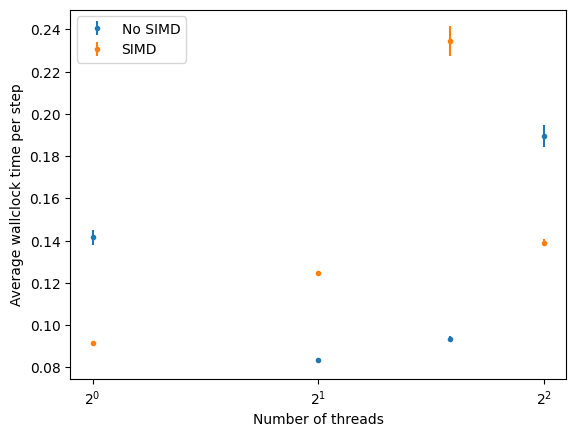

In [48]:
fig, ax = plt.subplots()
ax.set_xscale('log', base=2)
#ax.set_yscale('log', base=10)
ax.errorbar(np.array(range(len(h5_filenames))), results["average_times"], yerr=results["std_times"], \
            linestyle='', marker='.', label="No SIMD")
ax.set_xlabel("Number of threads")
ax.errorbar(np.array(range(len(simd_h5_filenames))), simd_results["average_times"], yerr=simd_results["std_times"], \
            linestyle='', marker='.', label="SIMD")
ax.set_xlabel("Number of threads")
ax.set_ylabel("Average wallclock time per step")
plt.legend()